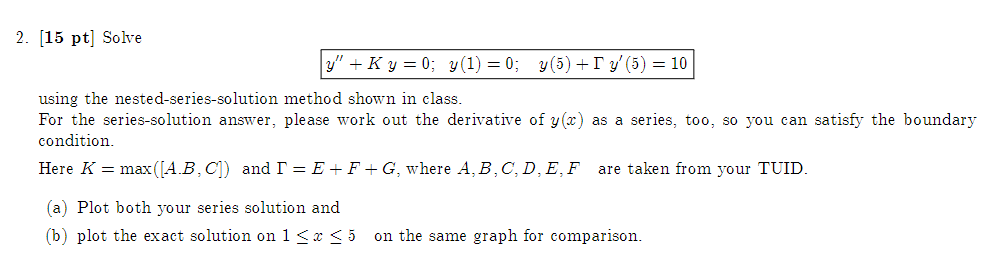

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
TUID = [9, 1, 5, 1, 8, 7, 2, 8, 9]
LETTER_MAP = ['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
total_sum = 0

for i in range(len(TUID)):
    total_sum += TUID[i]

average = total_sum / len(TUID)

print(f'my TUID average: {average}')

# Create a dictionary to map letters to integers
letter_to_int_map = {letter: integer for letter, integer in zip(LETTER_MAP, TUID)}

# Now, calculate the average of the letters of interest
K_letters = ["A", "B", "C"]
iota_letters = ["E", "F", "G"]

K = np.max([letter_to_int_map[letter] for letter in K_letters])
print(K)

iota = np.sum([letter_to_int_map[letter] for letter in iota_letters])
print(iota)


my TUID average: 5.555555555555555
9
14


### Nested Power Series Solutiuon

In [33]:
# Number of terms for power series
N = 50

# Coefficient generation for power series
a = [0] * (N+1)
a[0] = 1
a[1] = 0

for p in range(N-1):
    a[p+2] = -9*a[p]/((p+2)*(p+1))

# Power series approximation
def y_approx(x):
    return sum([a[p] * (x**p) for p in range(N+1)])


### Exact Solution

In [34]:
# Exact solution
C1 = 1
C2 = 0
def y_exact(x):
    return C1 * np.cos(3*x) + C2 * np.sin(3*x)

# Values for x
x_vals = np.linspace(1, 5, 400)
y_approx_vals = [y_approx(x) for x in x_vals]
y_exact_vals = [y_exact(x) for x in x_vals]

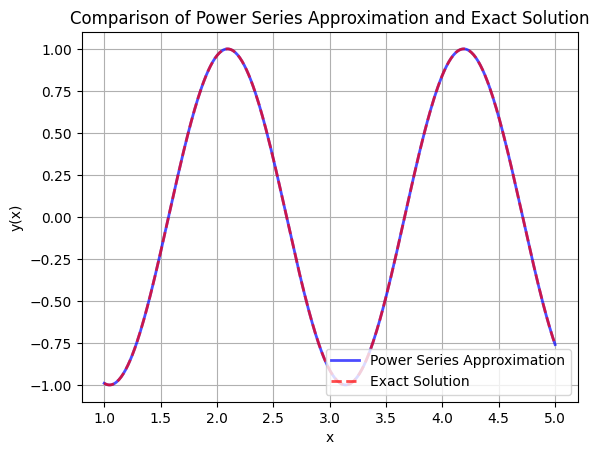

In [35]:
# Plot
plt.plot(x_vals, y_approx_vals, label='Power Series Approximation', linewidth=2, color='blue', alpha=0.7)
plt.plot(x_vals, y_exact_vals, label='Exact Solution', linestyle='dashed', linewidth=2, color='red', alpha=0.7)
plt.title('Comparison of Power Series Approximation and Exact Solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()